In [91]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
plt.rcParams['axes.labelsize'] = 13
plt.rcParams['axes.titlesize'] = 13

# Solving the stationary Schrödinger equation

## 1.A particle in a box

$$-\frac{\hslash}{2m}\frac{\partial^2}{\partial x^2}\psi (x) + V\psi(x)=E\psi(x)$$

### The shooting mehtod

In [92]:
# constants
hBar=1
mParticle=1
# To ease the calculation process we will assume they are equal to 1, and then scale them if needed.
vIn=0 #the potential inside the box.

#variables that can be changed.
a=1 #a boundary condition (the box is between 0 and a)

#starting conditions
psi0=0
dPsi0=1 # first derivative of psi, any value other than 0 (for now)
E=4.94 # assumption (trial and error till finding an energy that converges to 0 at x=a 
       # after solving the equation)
       # (That's very tedious of coures, so we will automate this process later on.)

In [93]:
def f(x,psi):
    psiVal=psi[0]
    dPsi=psi[1]
    d2Psi=2*mParticle/hBar**2 *(vIn-E)*psiVal
    return [dPsi,d2Psi]    

In [94]:
#setting the boundry conditions of the box
x0=0
xFinal=a
xList=np.linspace(x0,xFinal,1001)

#solving this differential equation.
solution=integrate.solve_ivp(f,[x0,xFinal],[psi0,dPsi0],method='RK45',t_eval=xList)

Text(0, 0.5, 'Eigenfunction')

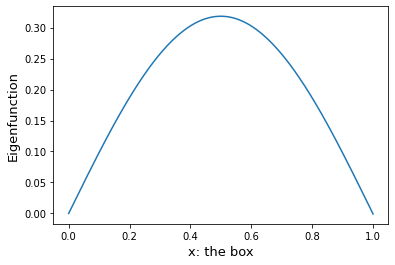

In [95]:
plt.plot(solution.t,solution.y[0])
plt.xlabel("x: the box")
plt.ylabel("Eigenfunction")
#now we can say that E=4.94 is our first eigenvalue, and solution.y[0] is our first eigen function

* automating finding the eigenvalues process

In [96]:
E=0
counter=0
nTarget=5  #the number of eigenenergies (or eigenvalues) we are looking for
dE=0.01    # stepsize in energy
eigenFunctions=[]
eigenEnergies=[]
while counter<nTarget:
    begin=1 #to start the next loop
    while(begin==1 or abs(solution.y[0][-1])>0.001):
        begin=0
        pis0=0
        dPsi0=1
        E=E+dE
        solution=integrate.solve_ivp(f,[x0,xFinal],[psi0,dPsi0],method='RK45',t_eval=xList)
    eigenEnergies.append(E)
    E=E+0.2 #to avoid adding the same eigenenergy twice (for example the computer may add both 4.92 and 4.93 as eigenvalues)
    counter=counter+1
    eigenFunctions.append(solution.y[0])
        

Text(0, 0.5, 'Eigenfunction')

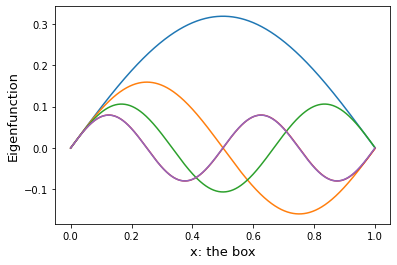

In [97]:
counter=0
while counter<nTarget:
    plt.plot(solution.t,eigenFunctions[counter])
    counter=counter+1
plt.xlabel("x: the box")
plt.ylabel("Eigenfunction")

We notice that these functions aren't normalized yet, so we have to normalize them.

In [98]:
counter=0
dx=a/1000
while counter<nTarget:
    norm=np.dot(eigenFunctions[counter],eigenFunctions[counter])*dx
    eigenFunctions[counter][:] = [x / np.sqrt(norm) for x in eigenFunctions[counter]]
    counter=counter+1

* After Normalization

Text(0, 0.5, 'Eigenfunction')

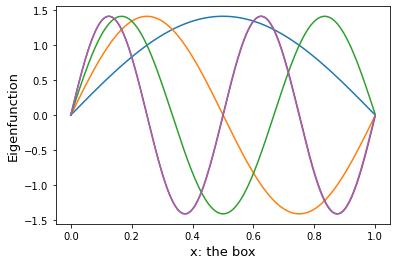

In [99]:
counter=0
while counter<nTarget:
    plt.plot(solution.t,eigenFunctions[counter])
    counter=counter+1
plt.xlabel("x: the box")
plt.ylabel("Eigenfunction")

<BarContainer object of 5 artists>

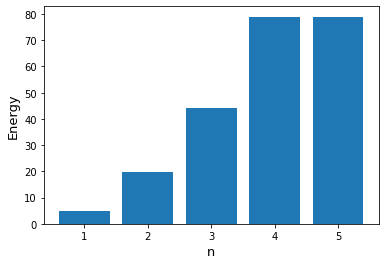

In [100]:
plt.xlabel("n")
plt.ylabel("Energy")
plt.bar(np.arange(1,len(eigenEnergies)+1,1),eigenEnergies)  

## 2.Harmonic oscillator

$$ V(x) = \frac{1}{2}kx^2 $$

In [101]:
k=1
V0=0.5*k
def fHarmonic(x,psi):
    psiVal=psi[0]
    dPsi=psi[1]
    d2Psi=2*mParticle/hBar**2 *(V0*x**2-E)*psiVal
    return [dPsi,d2Psi]    

Text(0, 0.5, 'Eigenfunction')

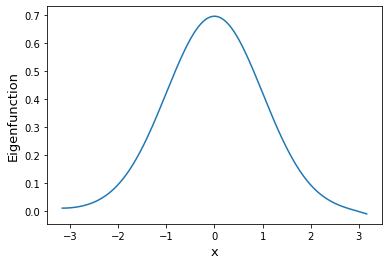

In [102]:

#intial values:
psi0=0.01 #not equal to zero, as this is not a particle in a box.
dPsi0=0 #considering it to be very small or zero at the beginning to avoid getting gigantic results.
E=0.5  

#V0*x**2 = E + constant 
a=np.sqrt(9+ E/V0)
#I used trial and error method to determine this constant,
#basically I found the first eigen value manually, then used it
# to find the constant.

x0=-a
xList=np.linspace(x0,a,1001)
solutionHarmonic=integrate.solve_ivp(fHarmonic,[x0,a],[psi0,dPsi0],method='RK45',t_eval=xList)
plt.plot(solutionHarmonic.t,solutionHarmonic.y[0])
plt.xlabel("x")
plt.ylabel("Eigenfunction")


* automating finding the eigenvalues

In [103]:
E=0
counter=0
nTarget=5  #the number of eigenenergies we are looking for
dE=0.05    # stepsize in energy
eigenFunctionsH=[]
eigenEnergiesH=[]
while counter<nTarget:
    begin=1 #to start the next loop
    while(begin==1 or abs(solutionHarmonic.y[0][-1])>0.02):
        begin=0
        pis0=0.01
        dPsi0=0
        E=E+dE
        a=np.sqrt(9+ E/V0)
        x0=-a
        xList=np.linspace(x0,a,1001)
        solutionHarmonic=integrate.solve_ivp(fHarmonic,[x0,a],[psi0,dPsi0],method='RK45',t_eval=xList)
    eigenEnergiesH.append(E)
    E=E+0.2 #to avoid adding the same eigenenergy twice (the computer may add both 4.92 and 4.93 as eigenvalues for example)
    counter=counter+1
    eigenFunctionsH.append(solutionHarmonic.y[0])

* Normalizing it

In [104]:
counter=0
dx=a/1000
while counter<nTarget:
    norm=np.dot(eigenFunctionsH[counter],eigenFunctionsH[counter])*dx
    eigenFunctionsH[counter][:] = [x / np.sqrt(norm) for x in eigenFunctionsH[counter]]
    counter=counter+1

In [105]:
np.dot(eigenFunctionsH[2],eigenFunctionsH[2])*dx

1.0000000000000002

Text(0, 0.5, 'Eigenfunction')

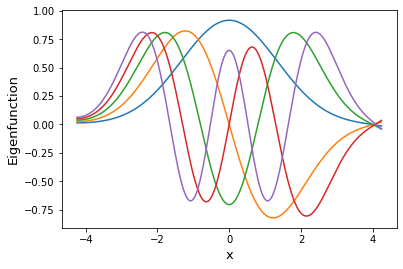

In [106]:
counter=0
while counter<nTarget:
    plt.plot(solutionHarmonic.t,eigenFunctionsH[counter])
    counter=counter+1
plt.xlabel("x")
plt.ylabel("Eigenfunction")

* plotting the probability density

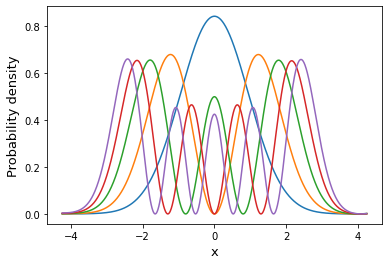

In [107]:
count=0
while (count<nTarget):
    plt.xlabel("x")
    plt.ylabel("Probability density")
    plt.plot(solutionHarmonic.t,np.square(eigenFunctionsH[count]))
    count=count+1

* The Final Plot

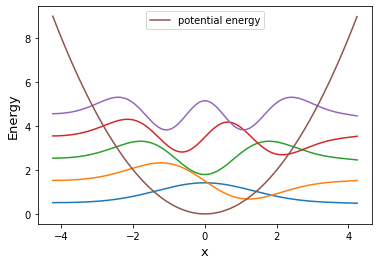

In [109]:
count=0
while count< nTarget:
    plt.plot(solutionHarmonic.t,eigenFunctionsH[count]+eigenEnergiesH[count])
    count=count+1
    
x1=np.arange(-a,a,a/1000)
plt.plot(x1,V0*x1**2,label='potential energy')
plt.xlabel('x')
plt.ylabel('Energy')
plt.legend()